# Thresholding and Contour Finding

In [4]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

## Image import

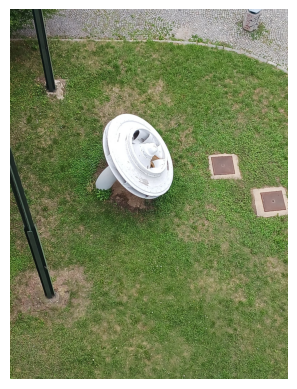

In [5]:
# Image URL
url = "https://d34-a.sdn.cz/d_34/c_img_oc_A/kcukOQcMmDmihgBArD8cUuZ/0d47.jpeg?fl=rot,270,0|res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()

## Thresholding

### Global Thresholding (simple binary)

In [6]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

def apply_global(thresh=127):
    _, th = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
    plt.figure(figsize=(6,6))
    plt.imshow(th, cmap="gray")
    plt.axis("off")
    plt.show()

interact(apply_global, thresh=widgets.IntSlider(min=0, max=255, step=1, value=127))

interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

<function __main__.apply_global(thresh=127)>

### Adaptive Thresholding

In [7]:
def apply_adaptive(block_size=11, C=2):
    if block_size % 2 == 0:  # must be odd
        block_size += 1
    th = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY, block_size, C)
    plt.figure(figsize=(6,6))
    plt.imshow(th, cmap="gray")
    plt.axis("off")
    plt.show()

interact(apply_adaptive,
         block_size=widgets.IntSlider(min=3, max=51, step=2, value=11),
         C=widgets.IntSlider(min=-10, max=10, step=1, value=2))

interactive(children=(IntSlider(value=11, description='block_size', max=51, min=3, step=2), IntSlider(value=2,…

<function __main__.apply_adaptive(block_size=11, C=2)>

### Otsu Thresholding

In [8]:
def apply_otsu(blur_size=5):
    if blur_size % 2 == 0:  # must be odd
        blur_size += 1
    blur = cv.GaussianBlur(gray, (blur_size, blur_size), 0)
    _, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    plt.figure(figsize=(6,6))
    plt.imshow(th, cmap="gray")
    plt.axis("off")
    plt.show()

interact(apply_otsu, blur_size=widgets.IntSlider(min=1, max=21, step=2, value=5))

interactive(children=(IntSlider(value=5, description='blur_size', max=21, min=1, step=2), Output()), _dom_clas…

<function __main__.apply_otsu(blur_size=5)>

## Contour Matching

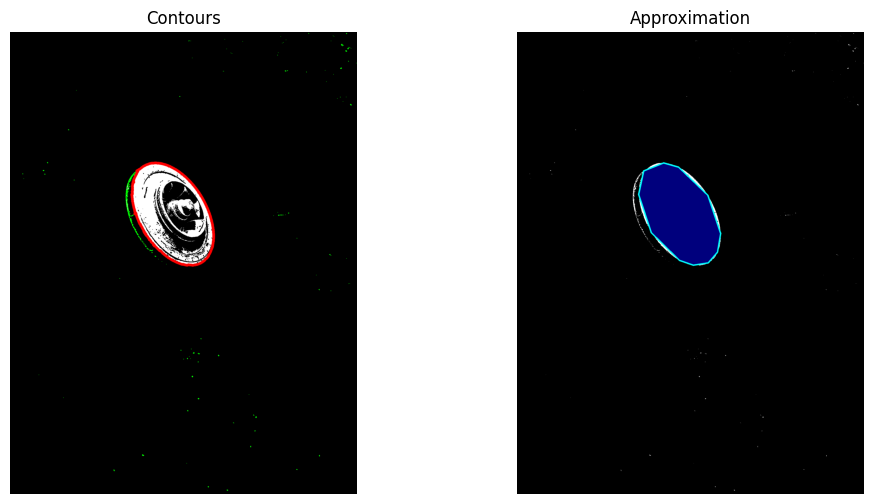

In [9]:
# Example: simple global threshold
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
_, thresh = cv.threshold(gray, 245, 255, cv.THRESH_BINARY)

# Find contours
# RETR_EXTERNAL: only outer contours
# CHAIN_APPROX_SIMPLE: compresses horizontal/vertical segments
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the thresholded image
contour_img = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)  # convert to BGR to draw in color
poly_img = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)
cv.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # green, thickness=2

# Draw largest countour with different colour
largest = max(contours, key=cv.contourArea)
cv.drawContours(contour_img, [largest], -1, (255, 0, 0), 12)


# Display
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(contour_img)
plt.title("Contours")
plt.axis("off")

plt.subplot(122)
# Approximate and draw
epsilon = 0.01 * cv.arcLength(largest, True)  # 2% of the perimeter
approx = cv.approxPolyDP(largest, epsilon, True)
cv.drawContours(poly_img, [approx], -1, (0,0,125), -1)
cv.drawContours(poly_img, [approx], -1, (0,255,255), 5)
plt.imshow(poly_img)
plt.title("Approximation")
plt.axis("off")

plt.show()